In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [223]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/avocado.csv',index_col=0)

In [224]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
5.0,22-11-2015,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany
6.0,15-11-2015,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany
7.0,08-11-2015,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany
8.0,01-11-2015,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany
9.0,25-10-2015,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany


In [225]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [226]:
# To  find missing values
df.isnull().sum()

Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

In [227]:
df=df.dropna()

In [228]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [31]:
df.shape

(1517, 13)

In [128]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [129]:
# Check data type
df.dtypes

Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
dtype: object

In [233]:
# Convert Date to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df['Month']=df['Date'].apply(lambda x:x.month)
df['Day']=df['Date'].apply(lambda x:x.day)

In [234]:
# Check data type
df.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                   float64
region                  object
Month                    int64
Day                      int64
dtype: object

In [235]:
df.head(10)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,Day
0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,12,27
1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,12,20
2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,12,13
3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,6,12
4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,11,29
5.0,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015.0,Albany,11,22
6.0,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015.0,Albany,11,15
7.0,2015-08-11,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015.0,Albany,8,11
8.0,2015-01-11,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015.0,Albany,1,11
9.0,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015.0,Albany,10,25


In [236]:
df.year.value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

In [237]:
# features in light colors are more correlated

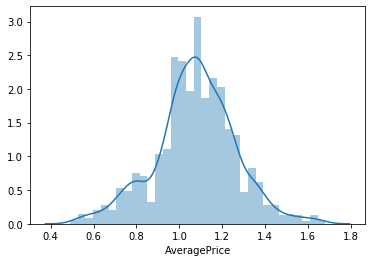

In [238]:
# Univariate analysis- distribution of average price
sns.distplot(df['AveragePrice'])

In [ ]:
# majority of price lies between 0.9 to 1.3

In [ ]:
# distribution of price over year


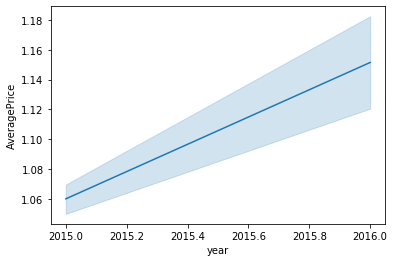

In [239]:
sns.lineplot(x="year", y="AveragePrice", data=df)

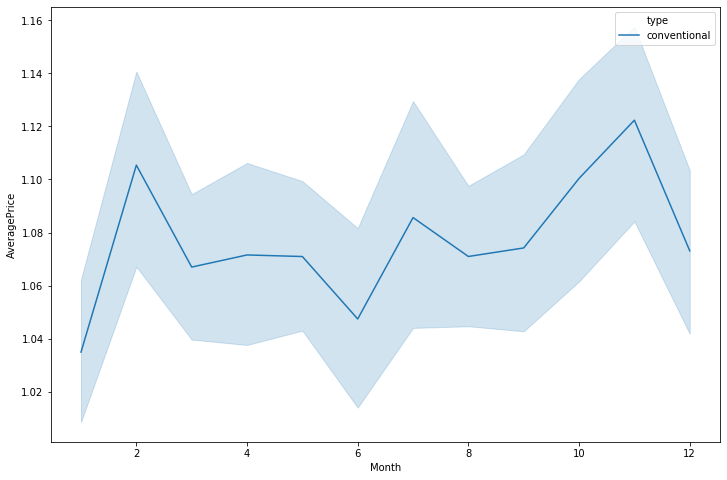

In [240]:
# month wise
plt.figure(figsize=(12,8))
sns.lineplot(x="Month", y="AveragePrice", hue='type', data=df)

In [140]:
#  hike in avg price from month 9 to 11 and in starting of month,also has saw fall in mid of year and also price increases from 2015 to 2016

Text(0, 0.5, 'Average Price')

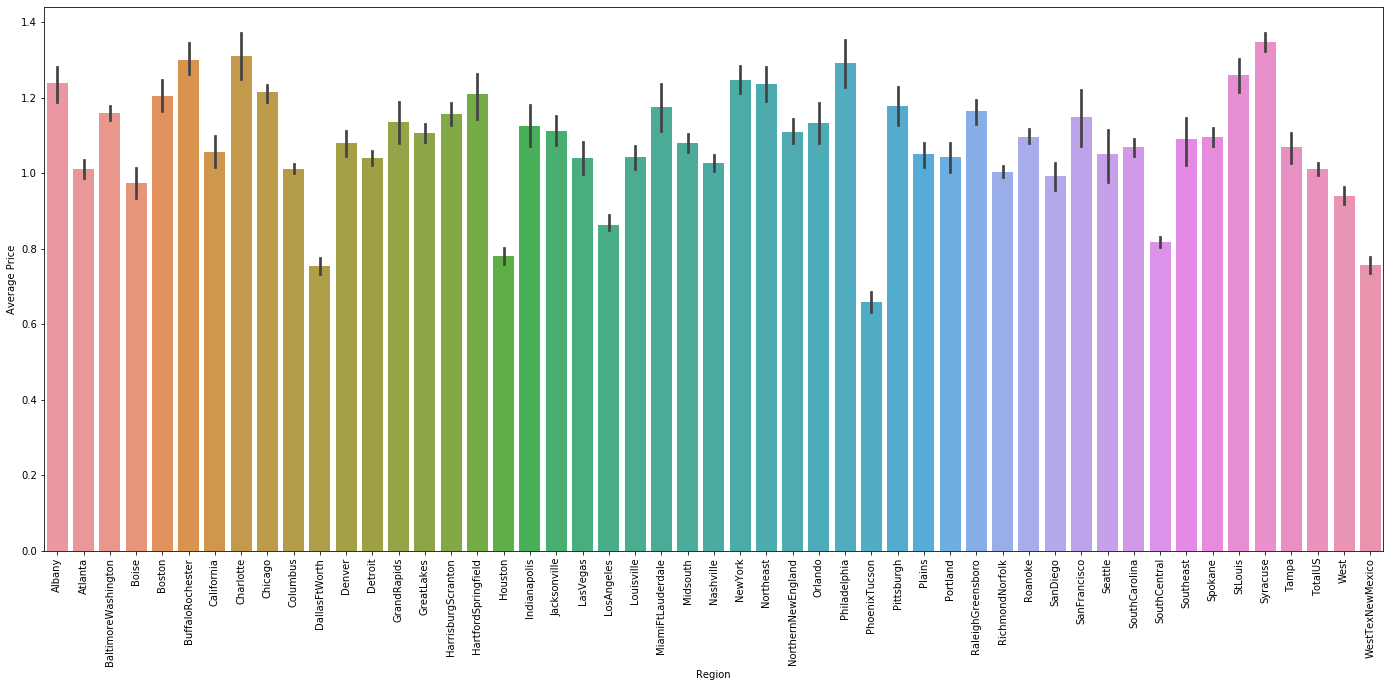

In [241]:
plt.figure(figsize=(24,10))
sns.barplot(x=df1.region,y=df1.AveragePrice,data=df1)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')

Text(0.5, 1.0, 'Average Price of Avocado According to Region')

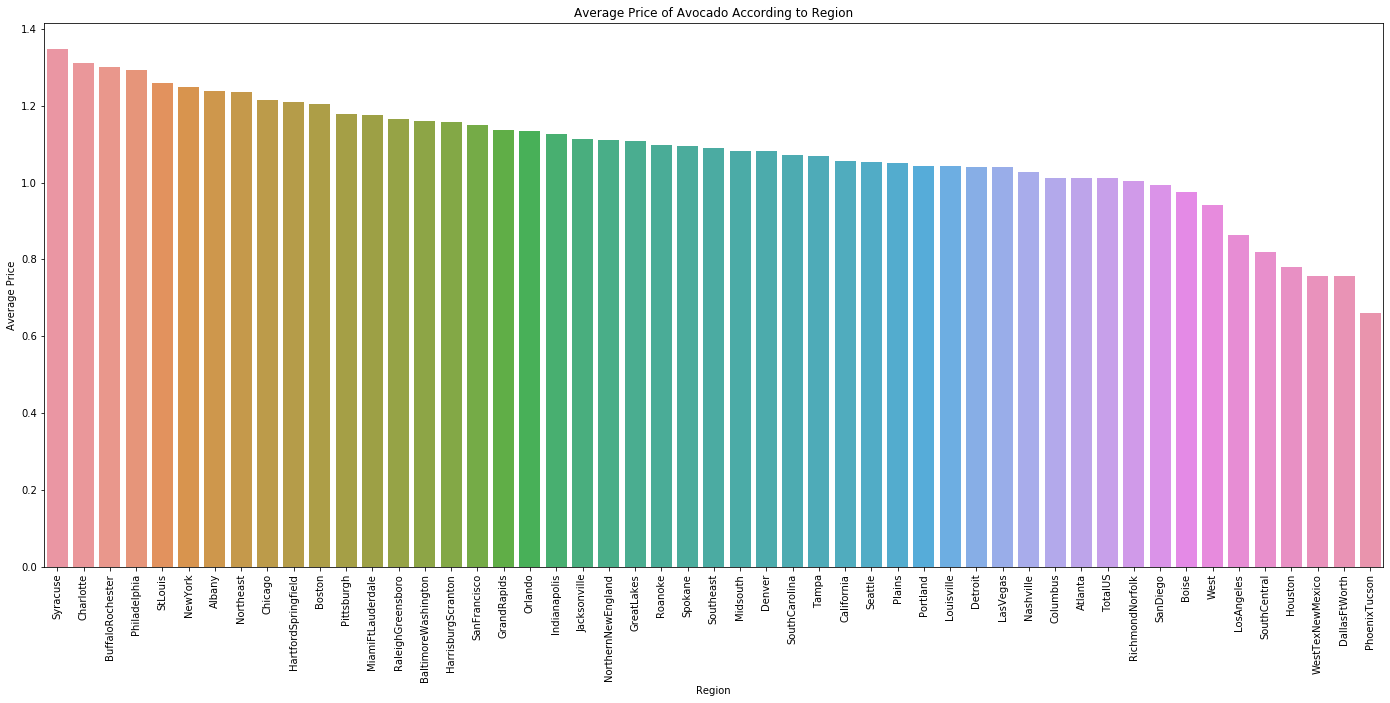

In [242]:
region_list=list(df.region.unique())
average_price=[]

for i in region_list:
    x=df[df.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')

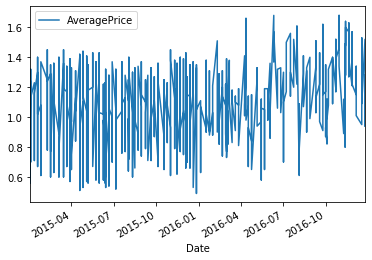

In [243]:
df.plot(x='Date', y='AveragePrice', kind="line")

In [244]:
regions = df.groupby(df.region)
print("Total regions :", len(regions))

Total regions : 51


In [245]:
df['region'].value_counts()

California             76
Albany                 67
Boise                  65
BaltimoreWashington    65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
NorthernNewEngland     29
Houston                29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
GrandRapids            23
Chicago                23
Pittsburgh             22
RichmondNorfolk        21
Orlando                21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
MiamiFtLauderdale      17
DallasFtWort

([<matplotlib.axis.XTick at 0x1c7e5944e80>,
 <a list of 5 Text xticklabel objects>)

<Figure size 864x1440 with 0 Axes>

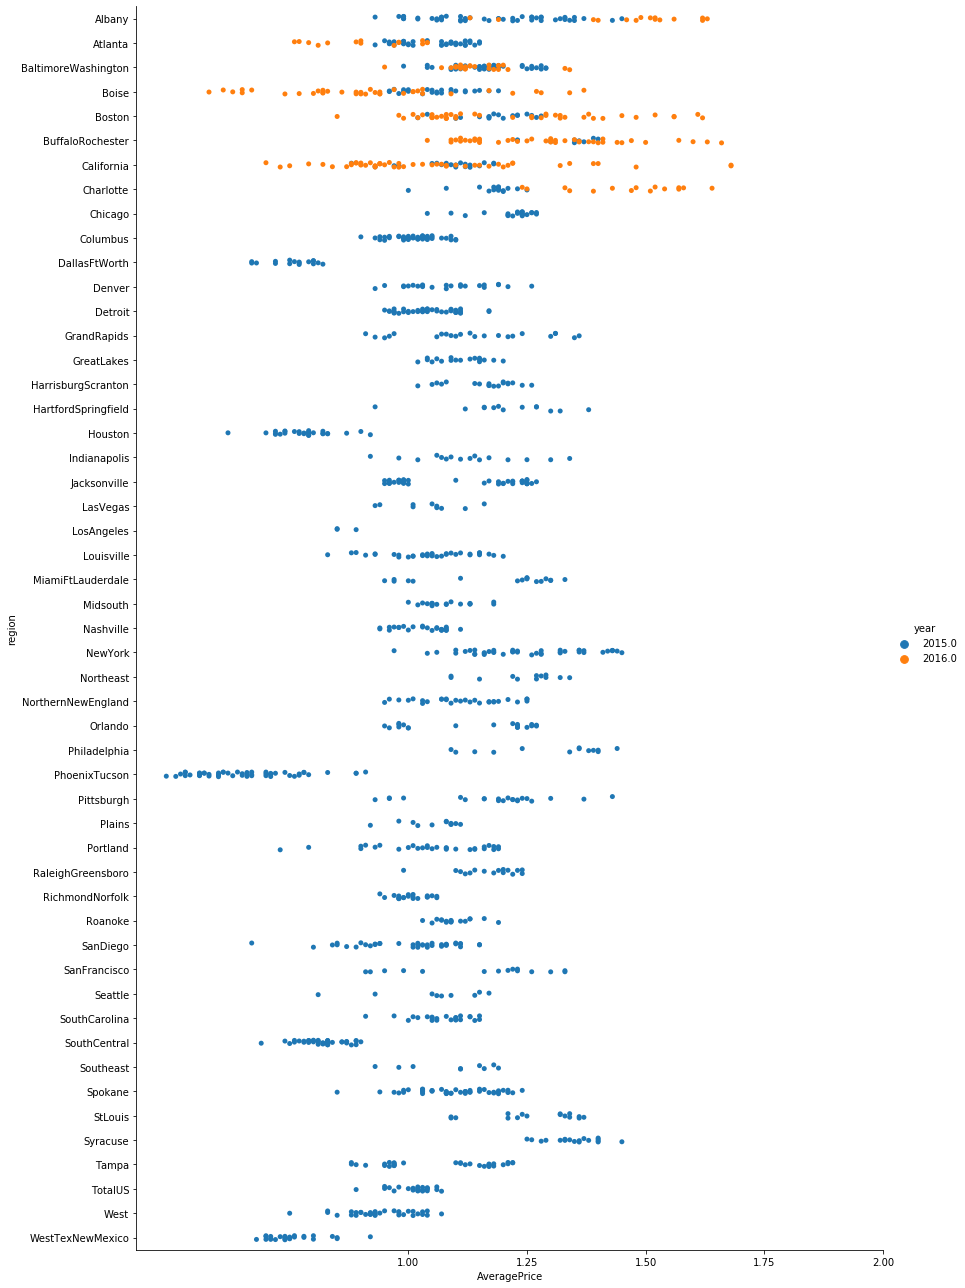

In [246]:
# In which year and for which region was the Average price the highest?
plt.figure(figsize=(12,20))
g=sns.catplot(x='AveragePrice',y='region',hue='year',data=df,size=18,aspect=0.7)
plt.xticks(np.linspace(1,2,5))

In [206]:
# rates were higher in 2016 

In [247]:
# lets check correlation
dfcorr=df.corr()
dfcorr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.060642,0.092589
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.055212,-0.034857
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.053007,-0.031806
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.058429,-0.044008
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.055079,-0.021318
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.047747,-0.021137
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.048978,-0.016462
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.039242,-0.046578
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.021452,0.019315
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,-0.013144,0.029744


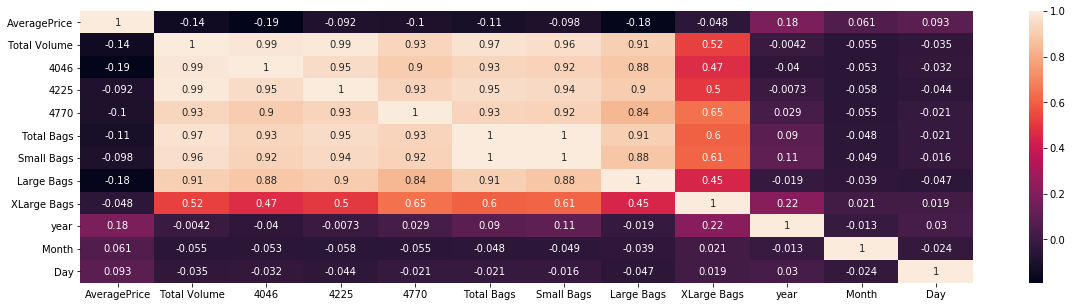

In [248]:
plt.figure(figsize=(20,5))
sns.heatmap(dfcorr,annot=True)

In [ ]:
# features are not correlated much with average price

In [275]:
# Date and type  can be dropped as we hve year,month,day and type is only conventional
df1=df.drop(['Date'],axis=1)
df1=df.drop(['type'],axis=1)

In [276]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [277]:
# Lets predict average price for California region

In [278]:
len(df1.groupby(df.region))

51

In [279]:
df1.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'year',
       'region', 'Month', 'Day'],
      dtype='object')

In [253]:
# Getting dt for region Californi
regions = df.groupby(df.region)

In [280]:
date_price = regions.get_group('California')[['AveragePrice','Total Volume','4046','4225','4770',
                                              'Total Bags','Small Bags','Large Bags','XLarge Bags','year','Month','Day']].reset_index(drop=True)

In [281]:
date_price.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'Month', 'Day'],
      dtype='object')

In [282]:
date_price

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
0,1.09,5806392.78,2859325.91,2077193.60,240185.00,629688.27,591629.83,33545.37,4513.07,2015.0,6,9
1,1.08,5647385.15,3104607.82,1660274.32,233027.36,649475.65,640600.64,5989.25,2885.76,2015.0,8,30
2,1.18,5193221.00,2626977.95,1798911.33,222082.91,545248.81,535183.95,6573.50,3491.36,2015.0,8,23
3,1.11,5616434.08,3098708.55,1731349.00,208724.73,577651.80,572197.46,2081.96,3372.38,2015.0,8,16
4,1.10,6232081.27,3260775.73,2196704.97,193831.60,580768.97,570728.54,7356.84,2683.59,2015.0,9,8
5,1.16,5428238.87,2940145.82,1737845.94,183471.03,566776.08,559587.76,4953.57,2234.75,2015.0,2,8
6,1.13,5557616.27,3112921.78,1636659.90,209427.05,598607.54,590750.10,5181.16,2676.28,2015.0,7,26
7,1.18,5225200.52,2805887.74,1629871.75,188207.47,601233.56,577736.96,20673.80,2822.80,2015.0,7,19
8,1.13,5451636.92,2747299.98,1923893.11,157478.05,622965.78,601358.64,18032.41,3574.73,2015.0,12,7
9,1.12,6718011.83,3581149.88,2120303.06,254187.47,762371.42,731692.08,27317.19,3362.15,2015.0,5,7


In [283]:
date_price.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
count,76.000000,7.600000e+01,7.600000e+01,7.600000e+01,76.000000,7.600000e+01,7.600000e+01,76.000000,76.000000,76.000000,76.000000,76.000000
mean,1.055921,6.035277e+06,2.410017e+06,1.984823e+06,225314.512500,1.415122e+06,1.286774e+06,109555.190526,18792.960132,2015.684211,6.421053,15.986842
std,0.183980,1.074116e+06,6.953430e+05,4.285563e+05,88256.196728,6.400455e+05,5.566337e+05,108080.870714,12577.262479,0.467918,3.184392,8.999990
min,0.700000,3.139834e+06,1.111432e+06,1.129206e+06,81897.440000,5.452488e+05,5.247680e+05,2081.960000,1486.340000,2015.000000,1.000000,1.000000
25%,0.930000,5.470463e+06,1.893745e+06,1.742093e+06,165817.525000,6.602290e+05,6.332589e+05,27108.890000,3461.615000,2015.000000,4.000000,7.750000
50%,1.060000,6.089818e+06,2.364753e+06,1.967797e+06,218335.625000,1.595741e+06,1.443173e+06,73075.150000,19516.265000,2016.000000,6.000000,16.500000
75%,1.132500,6.530626e+06,2.850969e+06,2.139853e+06,299804.837500,1.885345e+06,1.664318e+06,156719.937500,29017.842500,2016.000000,9.000000,24.000000
max,1.680000,1.036170e+07,4.340117e+06,3.950852e+06,424389.600000,3.056113e+06,2.693843e+06,508755.560000,41117.010000,2016.000000,12.000000,31.000000


In [258]:
date_price['AveragePrice']

0     1.09
1     1.08
2     1.18
3     1.11
4     1.10
5     1.16
6     1.13
7     1.18
8     1.13
9     1.12
10    1.10
11    1.07
12    0.97
13    0.98
14    0.98
15    1.10
16    1.08
17    0.93
18    0.88
19    1.15
20    1.05
21    1.06
22    1.12
23    1.10
24    0.94
25    0.95
26    0.90
27    0.98
28    1.21
29    1.32
      ... 
46    1.20
47    1.14
48    1.08
49    1.10
50    1.03
51    1.06
52    1.01
53    0.94
54    0.98
55    0.90
56    0.97
57    0.79
58    0.75
59    0.84
60    0.93
61    0.94
62    0.93
63    0.93
64    0.91
65    0.96
66    0.92
67    0.89
68    0.89
69    0.82
70    0.70
71    0.88
72    0.88
73    0.90
74    0.87
75    0.73
Name: AveragePrice, Length: 76, dtype: float64

In [284]:
date_pricecorr=date_price.corr()

In [285]:
date_pricecorr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Month,Day
AveragePrice,1.000000,-0.789885,-0.287253,-0.670949,-0.583319,-0.483823,-0.441080,-0.613941,0.175464,-0.078663,0.387588,0.209089
Total Volume,-0.789885,1.000000,0.462321,0.870011,0.672080,0.500715,0.472343,0.540034,-0.064308,0.096927,-0.349291,-0.346315
4046,-0.287253,0.462321,1.000000,0.235343,0.156326,-0.489670,-0.499356,-0.254459,-0.632128,-0.741169,-0.102205,-0.190172
4225,-0.670949,0.870011,0.235343,1.000000,0.535615,0.460937,0.424084,0.549227,-0.031751,0.139881,-0.305233,-0.361274
4770,-0.583319,0.672080,0.156326,0.535615,1.000000,0.461521,0.426898,0.542795,-0.071346,0.166357,-0.432595,-0.157916
Total Bags,-0.483823,0.500715,-0.489670,0.460937,0.461521,1.000000,0.992359,0.740129,0.609917,0.851266,-0.211114,-0.110906
Small Bags,-0.441080,0.472343,-0.499356,0.424084,0.426898,0.992359,1.000000,0.652197,0.638572,0.856783,-0.196840,-0.076373
Large Bags,-0.613941,0.540034,-0.254459,0.549227,0.542795,0.740129,0.652197,1.000000,0.206758,0.527665,-0.265890,-0.271035
XLarge Bags,0.175464,-0.064308,-0.632128,-0.031751,-0.071346,0.609917,0.638572,0.206758,1.000000,0.866959,0.253032,0.065234
year,-0.078663,0.096927,-0.741169,0.139881,0.166357,0.851266,0.856783,0.527665,0.866959,1.000000,0.009890,-0.007332


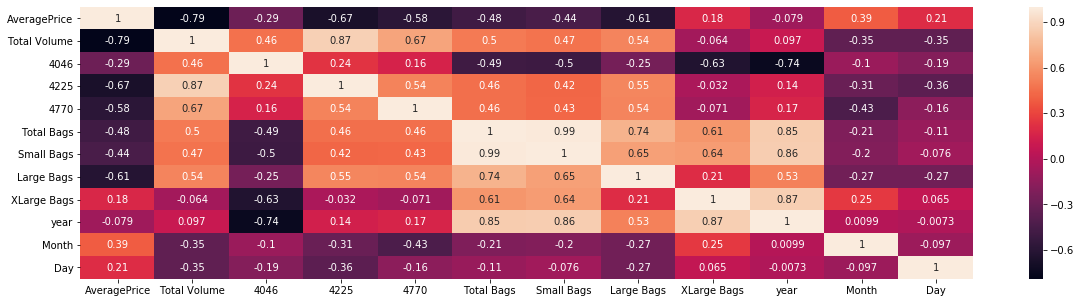

In [286]:
plt.figure(figsize=(20,5))
sns.heatmap(date_pricecorr,annot=True)

In [289]:
#Features are not much coorelated with Average price
# Selection of best models
date_price.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
Month             int64
Day               int64
dtype: object

In [290]:
# We will separate target and rest columns
x=date_price.drop(columns='AveragePrice')
y=date_price['AveragePrice']

In [291]:
x.shape,y.shape

((76, 11), (76,))

In [292]:
# Finding best r_state
def maxr2_score(lr,x,y):
    max_r_score=0
    for r_state in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=r_state)
        lr.fit(x_train,y_train)
        pred=lr.predict(x_test)
        r2_scr=r2_score(y_test,pred)
        print('r2 score corresponding to random state',r_state," is ",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print('max r2 score corresponding to ', final_r_state," is ",max_r_score)
    return final_r_state

In [293]:
# Lets use LinearRegression
lr=LinearRegression()
r_state=maxr2_score(lr,x,y)

r2 score corresponding to random state 42  is  0.4527918647644028
r2 score corresponding to random state 43  is  0.4482639236816752
r2 score corresponding to random state 44  is  0.5970113366274659
r2 score corresponding to random state 45  is  0.6622307179833888
r2 score corresponding to random state 46  is  -0.20251934105382108
r2 score corresponding to random state 47  is  0.5534868215177629
r2 score corresponding to random state 48  is  0.8438182354102512
r2 score corresponding to random state 49  is  0.6241644153623577
r2 score corresponding to random state 50  is  0.2645998648305794
r2 score corresponding to random state 51  is  0.7664917791175316
r2 score corresponding to random state 52  is  0.5864071185729485
r2 score corresponding to random state 53  is  0.667987627677121
r2 score corresponding to random state 54  is  0.6744008523592455
r2 score corresponding to random state 55  is  0.775598343947951
r2 score corresponding to random state 56  is  0.32663322480227386
r2 score 

In [295]:
# To find optimum value of n_neighbours for KNN model
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
neighbors={"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr=GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 2}

In [298]:
# Lets use KNN regression model
knr=KNeighborsRegressor(n_neighbors=2)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to random state 42  is  0.7840036451329695
r2 score corresponding to random state 43  is  0.7994017244413163
r2 score corresponding to random state 44  is  0.6835165837857564
r2 score corresponding to random state 45  is  0.5110973469598427
r2 score corresponding to random state 46  is  0.31508010511146856
r2 score corresponding to random state 47  is  0.7094034916993939
r2 score corresponding to random state 48  is  0.6396787296898077
r2 score corresponding to random state 49  is  0.5392817747272951
r2 score corresponding to random state 50  is  0.32208619488404533
r2 score corresponding to random state 51  is  0.786021302899061
r2 score corresponding to random state 52  is  0.04181901279707434
r2 score corresponding to random state 53  is  0.8923384464751958
r2 score corresponding to random state 54  is  0.7129698410340216
r2 score corresponding to random state 55  is  0.6571588366890377
r2 score corresponding to random state 56  is  -0.6186024401838075
r2 scor

In [297]:
# using Lasso
from sklearn.linear_model import Lasso
lsreg=Lasso()
parameters={'alpha':[0.001,0.01,0.1,1]}
clf=GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [299]:
# Lts check max r2 score 
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to random state 42  is  0.45551486339698255
r2 score corresponding to random state 43  is  0.5316802652909205
r2 score corresponding to random state 44  is  0.6629034038007766
r2 score corresponding to random state 45  is  0.789730198846339
r2 score corresponding to random state 46  is  -0.09822411546470966
r2 score corresponding to random state 47  is  0.590337647140436
r2 score corresponding to random state 48  is  0.8438869599721346
r2 score corresponding to random state 49  is  0.7962704262722412
r2 score corresponding to random state 50  is  0.3953577424144483
r2 score corresponding to random state 51  is  0.8162705911864
r2 score corresponding to random state 52  is  0.693269196394368
r2 score corresponding to random state 53  is  0.5741386007331899
r2 score corresponding to random state 54  is  0.7180022706780753
r2 score corresponding to random state 55  is  0.8501430065841357
r2 score corresponding to random state 56  is  0.4056976023831007
r2 score corr

In [300]:
# we will use gradient boosting Technique
# for getting best prameters will use grid search
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500]}
clf=GridSearchCV(gbr,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [301]:
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
r_state=maxr2_score(gbr,x,y)

r2 score corresponding to random state 42  is  0.8335848942669922
r2 score corresponding to random state 43  is  0.9164091655372408
r2 score corresponding to random state 44  is  0.9093381680615865
r2 score corresponding to random state 45  is  0.7679525876336535
r2 score corresponding to random state 46  is  0.22940700683676118
r2 score corresponding to random state 47  is  0.8766756386710974
r2 score corresponding to random state 48  is  0.6837916610519925
r2 score corresponding to random state 49  is  0.7625114911314302
r2 score corresponding to random state 50  is  0.6787863430174581
r2 score corresponding to random state 51  is  0.8650221976325199
r2 score corresponding to random state 52  is  0.15235930143683796
r2 score corresponding to random state 53  is  0.7872161098061705
r2 score corresponding to random state 54  is  0.8222980238197526
r2 score corresponding to random state 55  is  0.7968730845766947
r2 score corresponding to random state 56  is  -0.1877866175076932
r2 scor

In [302]:
# Use adaboost
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_reg=AdaBoostRegressor()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],'base_estimator':[lr,lsreg,DecisionTreeRegressor()]}
clf=GridSearchCV(ada_reg,parameters,cv=5)
clf.fit(x,y)

clf.best_params_

{'base_estimator': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 'learning_rate': 0.001,
 'n_estimators': 100}

In [303]:
# Decision Tree
Dt=DecisionTreeRegressor()
ada_reg=AdaBoostRegressor(base_estimator=Dt,learning_rate=0.001,n_estimators=100)
r_state=maxr2_score(ada_reg,x,y)

r2 score corresponding to random state 42  is  0.8545503039463009
r2 score corresponding to random state 43  is  0.8975622301330555
r2 score corresponding to random state 44  is  0.8903234636616636
r2 score corresponding to random state 45  is  0.7117786724476103
r2 score corresponding to random state 46  is  0.4068548501031338
r2 score corresponding to random state 47  is  0.8222407581181432
r2 score corresponding to random state 48  is  0.73301329394387
r2 score corresponding to random state 49  is  0.765657556073048
r2 score corresponding to random state 50  is  0.7830198069075347
r2 score corresponding to random state 51  is  0.8906200109707474
r2 score corresponding to random state 52  is  0.24223034734917726
r2 score corresponding to random state 53  is  0.7650130548302873
r2 score corresponding to random state 54  is  0.8177091071163274
r2 score corresponding to random state 55  is  0.8124001278363693
r2 score corresponding to random state 56  is  -0.24671209000158512
r2 score c

In [71]:
# GradientBoostingRegressor is the best model

In [305]:
# lets check cross val score
from sklearn.model_selection import cross_val_score
print("Mean r2 score",cross_val_score(gbr,x,y,cv=4,scoring="r2").mean())
print("Mean r2 score",cross_val_score(gbr,x,y,cv=4,scoring="r2").mean())

Mean r2 score -0.5249050077519646
Mean r2 score -0.5120233100194865


In [319]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=62)
gbr.fit(x_train,y_train)
pred=gbr.predict(x_test)
r2_scr=r2_score(y_test,pred)

In [320]:
pred

array([1.01684974, 0.97365797, 1.07218948, 1.15622949, 1.09569129,
       0.91451502, 0.99645697, 0.79184662, 0.92367577, 0.87611445,
       1.34033126, 0.86901432, 1.14912575, 1.11700521, 1.54993921,
       0.91350884])

In [321]:
print("r2 score",r2_score(y_test,pred))

r2 score 0.9266664458992974


In [322]:
print("RMSE is : ",np.sqrt(mean_squared_error(y_test,pred)))

RMSE is :  0.055493701782421946


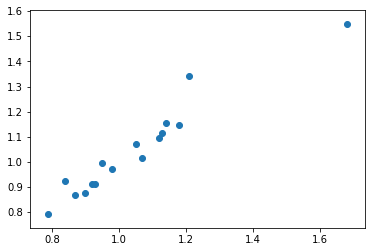

In [323]:
plt.scatter(x=y_test,y=pred)



In [324]:
from sklearn.externals import joblib

In [325]:
joblib.dump(gbr,"Avgprice_predict.pkl")

['Avgprice_predict.pkl']

In [326]:
a=[pred,y_test]

In [327]:
a

[array([1.01684974, 0.97365797, 1.07218948, 1.15622949, 1.09569129,
        0.91451502, 0.99645697, 0.79184662, 0.92367577, 0.87611445,
        1.34033126, 0.86901432, 1.14912575, 1.11700521, 1.54993921,
        0.91350884]), 43    1.07
 54    0.98
 20    1.05
 47    1.14
 22    1.12
 66    0.92
 25    0.95
 57    0.79
 59    0.84
 26    0.90
 28    1.21
 74    0.87
 2     1.18
 6     1.13
 32    1.68
 63    0.93
 Name: AveragePrice, dtype: float64]